In [227]:
import pandas as pd
import numpy as np
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [373]:
fips_mapping = pd.read_csv('./Clean Data/countystate-fips.csv')

In [389]:
y = pd.read_csv('./Clean Data/Death.csv', dtype={'County':str})

In [390]:
y_1 = y.copy()
y_2 = y.copy()

In [ ]:
y['County'], y['State'] = y_1['County'].str.split(', ', 1).str
y['County'] = y['County'].apply(lambda x: str(x).split(' ')[0])

In [ ]:
y_1['County'], y_1['State'] = y_1['County'].str.split(', ', 1).str
y_1['County'] = y_1['County'].apply(lambda x: str(x).split(' ')[0])
y_1['year'] = y_1['year'] + 1


In [393]:
y_merged = pd.merge(y, y_1[['County', 'year', 'Deaths', 'Population', 'death_perpop', 'State']], how='inner', on=['year', 'County', 'State'])

In [397]:
y_selected = y_merged[['County', 'State', 'year', 'death_perpop_x', 'Deaths_y', 'Population_y','death_perpop_y']]

,County,State,year,death_perpop_x,Deaths_y,Population_y,death_perpop_y
0,Ada,ID,2012,0.004400,47,1202526,0.003908
1,Ada,ID,2013,0.004962,18,409061,0.004400
2,Ada,ID,2014,0.004082,62,1249392,0.004962
3,Ada,ID,2015,0.002418,87,2131180,0.004082
4,Adams,CO,2012,0.004460,138,2708658,0.005095


In [398]:
y_selected.columns = ['County', 'State', 'year', 'actual_death_perpop', 'last_year_num_deaths', 'last_year_pop', 'last_year_death_perpop']

In [399]:
y_selected['year'] = y_selected['year'] - 1
y_selected.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,County,State,year,actual_death_perpop,last_year_num_deaths,last_year_pop,last_year_death_perpop
0,Ada,ID,2011,0.004400,47,1202526,0.003908
1,Ada,ID,2012,0.004962,18,409061,0.004400
2,Ada,ID,2013,0.004082,62,1249392,0.004962
3,Ada,ID,2014,0.002418,87,2131180,0.004082
4,Adams,CO,2011,0.004460,138,2708658,0.005095


In [400]:
y = pd.merge(y_selected, fips_mapping, on=['County', 'State'], how='inner')
y['fips'] = y['fips'].apply(lambda x: (5-len(str(x)))*'0' + str(x) if len(str(x)) < 5  else str(x))
y.head()

1612


,County,State,year,actual_death_perpop,last_year_num_deaths,last_year_pop,last_year_death_perpop,fips
0,Ada,ID,2011,0.004400,47,1202526,0.003908,16001
1,Ada,ID,2012,0.004962,18,409061,0.004400,16001
2,Ada,ID,2013,0.004082,62,1249392,0.004962,16001
3,Ada,ID,2014,0.002418,87,2131180,0.004082,16001
4,Adams,CO,2011,0.004460,138,2708658,0.005095,08001


In [401]:
x1 = pd.read_csv('./Clean Data/opioidclaims_final.csv',dtype={'fips':str})
x2 = pd.read_csv('./Clean Data/unemployed_final.csv')
x3 = pd.read_csv('./Clean Data/violentcrimes_final.csv')
x4 = pd.read_csv('./Clean Data/loans_final_2.csv',dtype={'fips':str})

x1['fips'] = x1['fips'].apply(lambda x: (5-len(str(x)))*'0' + str(x) if len(str(x)) < 5  else str(x))
x2['fips'] = x2['fips'].apply(lambda x: (5-len(str(x)))*'0' + str(x) if len(str(x)) < 5  else str(x))
x3['fips'] = x3['fips'].apply(lambda x: (5-len(str(x)))*'0' + str(x) if len(str(x)) < 5  else str(x))
x4['fips'] = x4['fips'].apply(lambda x: (5-len(str(x)))*'0' + str(x) if len(str(x)) < 5  else str(x))

In [403]:
df = pd.merge(x1[['year', 'fips', 'opioid_prescribe_perc']],x2[['year', 'fips', 'Unemployment Rate']], on=['year', 'fips'], how='inner')
df = pd.merge(df,x3[['year', 'fips', 'total_crimes']], on=['year', 'fips'], how='inner')
df = pd.merge(df,x4[['year', 'fips', 'num_bank_loans', 'bank_loan_sum']], on=['year', 'fips'], how='inner')
df = pd.merge(df, y[['year', 'fips', 'last_year_num_deaths', 'last_year_pop', 'last_year_death_perpop', 'actual_death_perpop']],on=['year', 'fips'], how='inner')

1088

In [404]:
df.head()

,year,fips,opioid_prescribe_perc,Unemployment Rate,total_crimes,num_bank_loans,bank_loan_sum,last_year_num_deaths,last_year_pop,last_year_death_perpop,actual_death_perpop
0,2013,01043,7.254990,6.7,0,1,280000,15,80811,0.018562,0.028294
1,2013,01073,7.567119,6.7,0,3,611500,233,5935311,0.003926,0.007635
2,2013,01089,7.321607,6.3,0,3,526600,17,346892,0.004901,0.005138
3,2013,01117,7.549260,4.6,0,4,560500,24,204180,0.011754,0.006775
4,2013,04013,6.954345,6.6,191643,59,13449514,1231,72169416,0.001706,0.001820


In [239]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,10 hours 2 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.8
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_rhynadesee_7y38e2
H2O cluster total nodes:,1
H2O cluster free memory:,1.645 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [406]:
data = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [407]:
data.describe()

Rows:1088
Cols:11




,year,fips,opioid_prescribe_perc,Unemployment Rate,total_crimes,num_bank_loans,bank_loan_sum,last_year_num_deaths,last_year_pop,last_year_death_perpop,actual_death_perpop
type,int,int,real,real,int,int,int,int,int,real,real
mins,2011.0,1003.0,1.658907615,3.0,0.0,1.0,402.0,10.0,23987.0,0.00128213743806,0.00130594179774
mean,2012.7941176470624,30585.50183823529,6.1581645744972375,7.214522058823523,20738.29779411763,53.62959558823528,10183453.252757357,135.2968750000002,3336115.8318014736,0.008005373218968034,0.008348913888343431
maxs,2014.0,55139.0,13.3763687,14.8,226646.0,1157.0,203503560.0,1433.0,73569438.0,0.106750928733,0.0759105687564
sigma,1.0731662020776522,14086.390292736374,1.6383741888343444,1.8217308690414664,28704.25304279357,99.83601884908029,18486863.868775703,182.60216887688335,7044508.997350062,0.007033135518609418,0.006578158661499517
zeros,0,0,0,0,84,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0
0,2013.0,1043.0,7.254989593,6.7,0.0,1.0,280000.0,15.0,80811.0,0.018561829453900003,0.0282941111343
1,2013.0,1073.0,7.567118514,6.7,0.0,3.0,611500.0,233.0,5935311.0,0.00392565781304,0.00763545398552
2,2013.0,1089.0,7.321607256,6.3,0.0,3.0,526600.0,17.0,346892.0,0.00490066072438,0.00513846742354


In [408]:
# split data into train and test 
train_con = data['year'] <= 2014
test_con = data['year'] == 2014
train = data[train_con,:]
test = data[test_con,:]

In [410]:
train.describe()

Rows:1088
Cols:11




,year,fips,opioid_prescribe_perc,Unemployment Rate,total_crimes,num_bank_loans,bank_loan_sum,last_year_num_deaths,last_year_pop,last_year_death_perpop,actual_death_perpop
type,int,int,real,real,int,int,int,int,int,real,real
mins,2011.0,1003.0,1.658907615,3.0,0.0,1.0,402.0,10.0,23987.0,0.00128213743806,0.00130594179774
mean,2012.7941176470624,30585.50183823529,6.1581645744972375,7.214522058823523,20738.29779411763,53.62959558823528,10183453.252757357,135.2968750000002,3336115.8318014736,0.008005373218968034,0.008348913888343431
maxs,2014.0,55139.0,13.3763687,14.8,226646.0,1157.0,203503560.0,1433.0,73569438.0,0.106750928733,0.0759105687564
sigma,1.0731662020776522,14086.390292736374,1.6383741888343444,1.8217308690414664,28704.25304279357,99.83601884908029,18486863.868775703,182.60216887688335,7044508.997350062,0.007033135518609418,0.006578158661499517
zeros,0,0,0,0,84,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0
0,2013.0,1043.0,7.254989593,6.7,0.0,1.0,280000.0,15.0,80811.0,0.018561829453900003,0.0282941111343
1,2013.0,1073.0,7.567118514,6.7,0.0,3.0,611500.0,233.0,5935311.0,0.00392565781304,0.00763545398552
2,2013.0,1089.0,7.321607256,6.3,0.0,3.0,526600.0,17.0,346892.0,0.00490066072438,0.00513846742354


In [411]:
model_columns = list(df.columns.drop(['year', 'fips', 'actual_death_perpop']))
target_column = "actual_death_perpop"

In [412]:
#glm
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, remove_collinear_columns = True, compute_p_values = True)
glm.train(x = model_columns, 
          y = target_column, 
          training_frame = train)
glm.pprint_coef()

glm Model Build progress: |███████████████████████████████████████████████| 100%
Coefficients: glm coefficients



names,coefficients,std_error,z_value,p_value,standardized_coefficients
Intercept,0.0027525,0.0005007,5.4973565,0.0000000,0.0083489
opioid_prescribe_perc,-0.0000314,0.0000548,-0.5729403,0.5668045,-0.0000514
Unemployment Rate,-0.0001069,0.0000491,-2.1754644,0.0298118,-0.0001948
total_crimes,-0.0000000,0.0000000,-2.5870930,0.0098088,-0.0003205
num_bank_loans,0.0000077,0.0000040,1.9361323,0.0531124,0.0007653
bank_loan_sum,-0.0000000,0.0000000,-2.0086497,0.0448231,-0.0008024
last_year_num_deaths,0.0000024,0.0000010,2.4848955,0.0131096,0.0004427
last_year_pop,-0.0000000,0.0000000,-2.0294605,0.0426565,-0.0003816
last_year_death_perpop,0.8339411,0.0131365,63.4828970,0.0,0.0058652


In [413]:
glm.model_performance(test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 7.38525685775707e-06
RMSE: 0.0027175829072462665
MAE: 0.0018359719528113806
RMSLE: 0.0026744817563917915
R^2: 0.8154644387280567
Mean Residual Deviance: 7.38525685775707e-06
Null degrees of freedom: 358
Residual degrees of freedom: 350
Null deviance: 0.014463958071495326
Residual deviance: 0.002651307211934788
AIC: -3203.1550584648353


In [414]:
z = glm.predict(test)

glm prediction progress: |████████████████████████████████████████████████| 100%


//anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


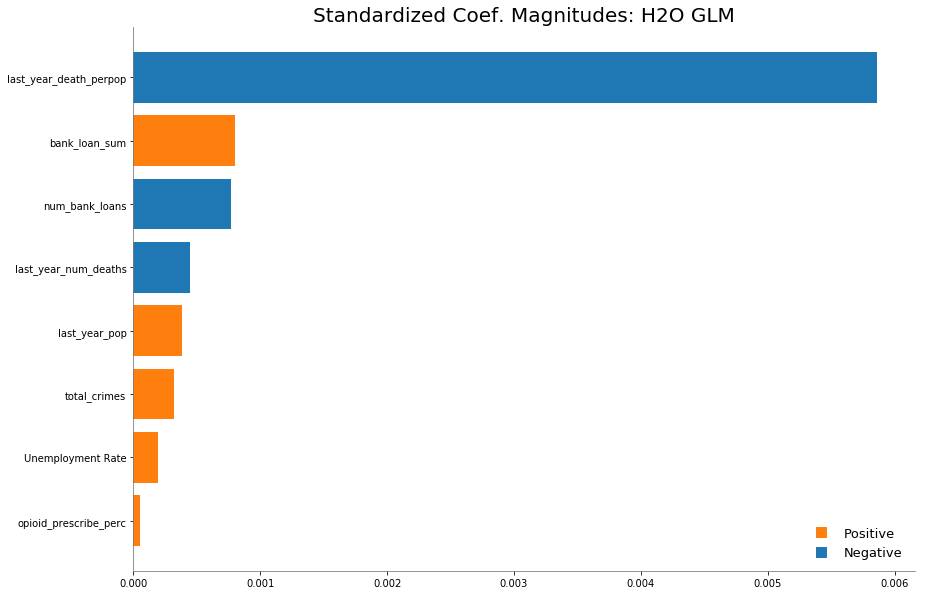

In [443]:
glm.std_coef_plot()

In [415]:
results = test.cbind(z)

In [445]:
results

year,fips,opioid_prescribe_perc,Unemployment Rate,total_crimes,num_bank_loans,bank_loan_sum,last_year_num_deaths,last_year_pop,last_year_death_perpop,actual_death_perpop,predict,StdErr
2014,1003,9.50442,6.1,4688,1,99000,31,400222,0.0077457,0.00834524,0.00826616,0.000214682
2014,1073,7.82395,6.3,9412,2,564050,555,7.26872e+06,0.00763545,0.00629127,0.00903875,0.000400259
2014,1089,7.21161,6.2,1696,4,1.18618e+06,18,350299,0.00513847,0.00821323,0.00613352,0.000143483
2014,1117,7.84651,4.5,2613,2,314000,56,826620,0.00677458,0.00862428,0.00773839,0.000194192
2014,1125,7.13979,5.9,3885,3,582120,20,202212,0.00989061,0.00882457,0.0101378,0.000135422
2014,4003,6.98438,8.4,6311,2,259600,10,127448,0.00784634,0.0110736,0.0081297,0.000132006
2014,4013,7.03009,5.8,188025,79,1.90815e+07,1339,7.35694e+07,0.00182005,0.00223931,0.0003692,0.000945557
2014,4015,8.37062,8.7,16667,1,417000,115,1.01680e+06,0.0113099,0.0113316,0.0110189,0.000172084
2014,4019,6.81455,6,60341,6,1.73096e+06,447,1.10497e+07,0.00404537,0.00379529,0.00505332,0.000239779
2014,4021,5.95249,7,14976,4,960924,40,1.20575e+06,0.00331743,0.00378766,0.00443737,0.000124719


In [442]:
h2o.export_file(results, path = 'results_5.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [444]:
result_1 = results.as_data_frame()

In [455]:
actual_top_10 = result_1.sort_values(by='actual_death_perpop', ascending=False)[['fips']].head(10).reset_index(drop=True)
predicted_top_10 = result_1.sort_values(by='predict', ascending=False)[['fips']].head(10).reset_index(drop=True)

table = pd.concat([actual_top_10, predicted_top_10], axis=1)
table.columns = ['actual top 10 counties with highest opioid death rates','predicted top 10 counties with highest opioid death rates']
table

,actual top 10 counties with highest opioid death rates,predicted top 10 counties with highest opioid death rates
0,21071,39047
1,39047,21071
2,21235,33007
3,39015,21235
4,33007,47021
5,54011,54099
6,47021,39101
7,54081,54081
8,33017,18177
9,42005,39015


In [427]:
data_original = y[y['year']==2013]
data_original = y[['year','fips','actual_death_perpop']]
data_original['year'] = data_original['year'] + 1

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [438]:
output = pd.merge(result_1, data_original,how='inner',on=['year', 'fips'])
output.head(3)

,year,fips,opioid_prescribe_perc,Unemployment Rate,total_crimes,num_bank_loans,bank_loan_sum,last_year_num_deaths,last_year_pop,last_year_death_perpop,actual_death_perpop_x,predict,StdErr,actual_death_perpop_y
0,2014,01073,7.823955,6.3,9412,2,564050,555,7268723,0.007635,0.006291,0.009039,0.000400,0.007635
1,2014,01089,7.211613,6.2,1696,4,1186175,18,350299,0.005138,0.008213,0.006134,0.000143,0.005138
2,2014,01117,7.846508,4.5,2613,2,314000,56,826620,0.006775,0.008624,0.007738,0.000194,0.006775


In [439]:
output['delta'] = (output['predict'] - output['actual_death_perpop_y']) / output['actual_death_perpop_y']
output.head()

,year,fips,opioid_prescribe_perc,Unemployment Rate,total_crimes,num_bank_loans,bank_loan_sum,last_year_num_deaths,last_year_pop,last_year_death_perpop,actual_death_perpop_x,predict,StdErr,actual_death_perpop_y,delta
0,2014,01073,7.823955,6.3,9412,2,564050,555,7268723,0.007635,0.006291,0.009039,0.000400,0.007635,0.183787
1,2014,01089,7.211613,6.2,1696,4,1186175,18,350299,0.005138,0.008213,0.006134,0.000143,0.005138,0.193648
2,2014,01117,7.846508,4.5,2613,2,314000,56,826620,0.006775,0.008624,0.007738,0.000194,0.006775,0.142269
3,2014,01125,7.139786,5.9,3885,3,582120,20,202212,0.009891,0.008825,0.010138,0.000135,0.009891,0.024996
4,2014,04013,7.030094,5.8,188025,79,19081535,1339,73569438,0.001820,0.002239,0.000369,0.000946,0.001820,-0.797149


In [440]:
output.to_csv('FINAL_FINAL_2014.csv')

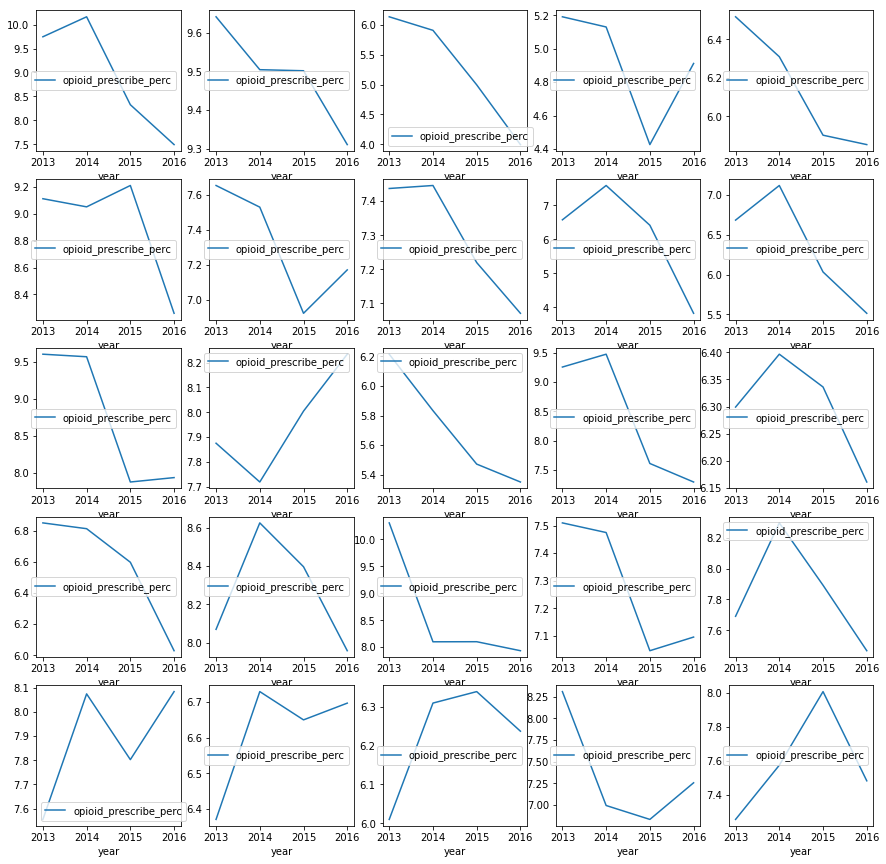

In [239]:
fig, axes = plt.subplots(nrows=5, ncols=5,  figsize=(15,15))

for i, fips in enumerate(x1.fips.unique()):
    if i <= 4:
        x1[x1['fips'] == fips].plot(x='year', y='opioid_prescribe_perc',ax=axes[0,i])
    elif i <= 9:
        x1[x1['fips'] == fips].plot(x='year', y='opioid_prescribe_perc',ax=axes[1,9-i])  
    elif i <= 14:
        x1[x1['fips'] == fips].plot(x='year', y='opioid_prescribe_perc',ax=axes[2,14-i])  
    elif i <= 19:
        x1[x1['fips'] == fips].plot(x='year', y='opioid_prescribe_perc',ax=axes[3,19-i])  
    elif i <= 24:
        x1[x1['fips'] == fips].plot(x='year', y='opioid_prescribe_perc',ax=axes[4,24-i])  


In [241]:
df.to_csv('final.csv')